In [86]:
import pandas as pd
import xlwings as xw
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
data = pd.read_csv('C:\\Users\\nbh.pharmacy\\OneDrive\\data analysis with python\\seaborn-data-master\\titanic.csv')

In [88]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Questions to answer:
### 1- how many people were on board of titanic?
### 2- how many people in each class? the majority?
### 3- the age distribution of people onboard?
### 4- sex distribution of people on board?
### 5- how many survived?
### 6- survivals according to sex, age and class?
### 7- if being alone increased chance of survival?

# 1- how many people were on board of titanic?

In [89]:
data.survived.count()

891

# 2- how many people in each class? the majority?

In [103]:
data.groupby('class').survived.count()
total = data.groupby('class').survived.count().sum()

([<matplotlib.patches.Wedge at 0x23e30630d90>,
 [Text(1.592214849372562, 1.518173861399777, 'First class'),
  Text(-1.2443352403626833, 1.8142849306521687, 'Second class'),
  Text(-0.351432130853342, -2.1717494002310396, 'Third class')],
 [Text(0.8684808269304883, 0.8280948334907875, '24.2%'),
  Text(-0.6787283129250998, 0.9896099621739101, '20.7%'),
  Text(-0.19169025319273197, -1.1845905819442033, '55.1%')])

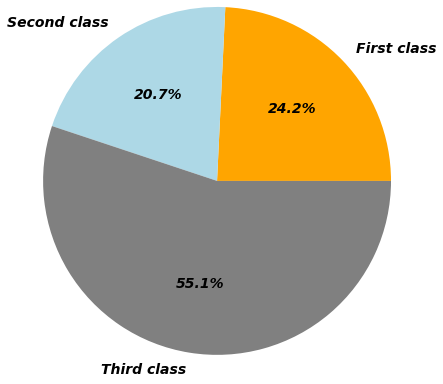

In [128]:
plt.pie(data.groupby('class').survived.count(),
        radius = 2,labels=['First class','Second class','Third class'],
        autopct = '%1.1f%%',textprops={'fontsize': 14,'weight':"bold","style":"oblique"},
        colors=['orange','lightblue','grey'] ) 

# 3- the age distribution of people onboard?

(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

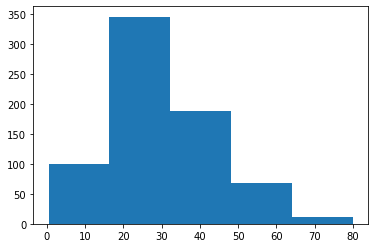

In [142]:
plt.hist(data['age'],label = 'Age',bins = 5)

# 4- sex distribution of people on board?

In [152]:
data.groupby('sex').survived.count()

sex
female    314
male      577
Name: survived, dtype: int64

([<matplotlib.patches.Wedge at 0x23e339d1820>,
 [Text(0.4919453215643337, 0.9838647267744507, 'Female'),
  Text(-0.4919452294482682, -0.9838647728336912, 'Male')],
 [Text(0.2683338117623638, 0.5366534873315185, '35.2%'),
  Text(-0.26833376151723715, -0.5366535124547406, '64.8%')])

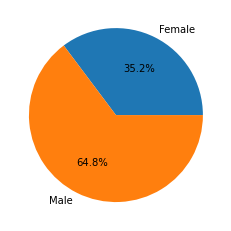

In [156]:
plt.pie(data.groupby('sex').survived.count(),labels=['Female','Male'],autopct='%1.1f%%')

# 5- how many survived?

In [165]:
data.groupby('survived').sex.count()

survived
0    549
1    342
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x23e33cd91c0>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Died'),
  Text(0.3925750313068116, -1.0275625746369201, 'Survived')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.4%')])

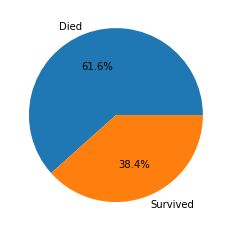

In [180]:
plt.pie(data.groupby('survived').sex.count(),labels=['Died','Survived'],autopct='%1.1f%%')

# 6- survivals according to sex, age and class?

In [199]:
data[data['survived'] == 1].groupby('sex').survived.count()


sex
female    233
male      109
Name: survived, dtype: int64

In [201]:
data[data['survived'] == 1].groupby('class').survived.count()


class
First     136
Second     87
Third     119
Name: survived, dtype: int64

# 7- if being alone increased chance of survival?

In [192]:
data[['survived','alone']].corr()

,survived,alone
survived,1.000000,-0.203367
alone,-0.203367,1.000000


# 8- if being old increased chance of survival?

In [202]:
data[['survived','age']].corr()

,survived,age
survived,1.000000,-0.077221
age,-0.077221,1.000000
